#### In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon

In [2]:
data = pd.read_csv('ESSdata_Thinkful.csv')

In [3]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [5]:
data.isnull().sum()*100/len(data)

cntry      0.000000
idno       0.000000
year       0.000000
tvtot      0.093088
ppltrst    0.162904
pplfair    0.453805
pplhlp     0.290901
happy      0.360717
sclmeet    0.174540
sclact     1.093786
gndr       0.116360
agea       2.781010
partner    0.197812
dtype: float64

In [6]:
# Dropping rows with NaNs since they are only a small percentage of the total data
data.dropna(inplace=True)

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [7]:
# Changing values in the year column from 6 and 7 to 2012 and 2014, respectively
data['year'] = np.where(data['year'] == 6, 2012, 2014)

In [8]:
countries = data['cntry'].unique()
trust_2012 = data[['cntry', 'ppltrst']][data['year'] == 2012]
trust_2014 = data[['cntry', 'ppltrst']][data['year'] == 2014]

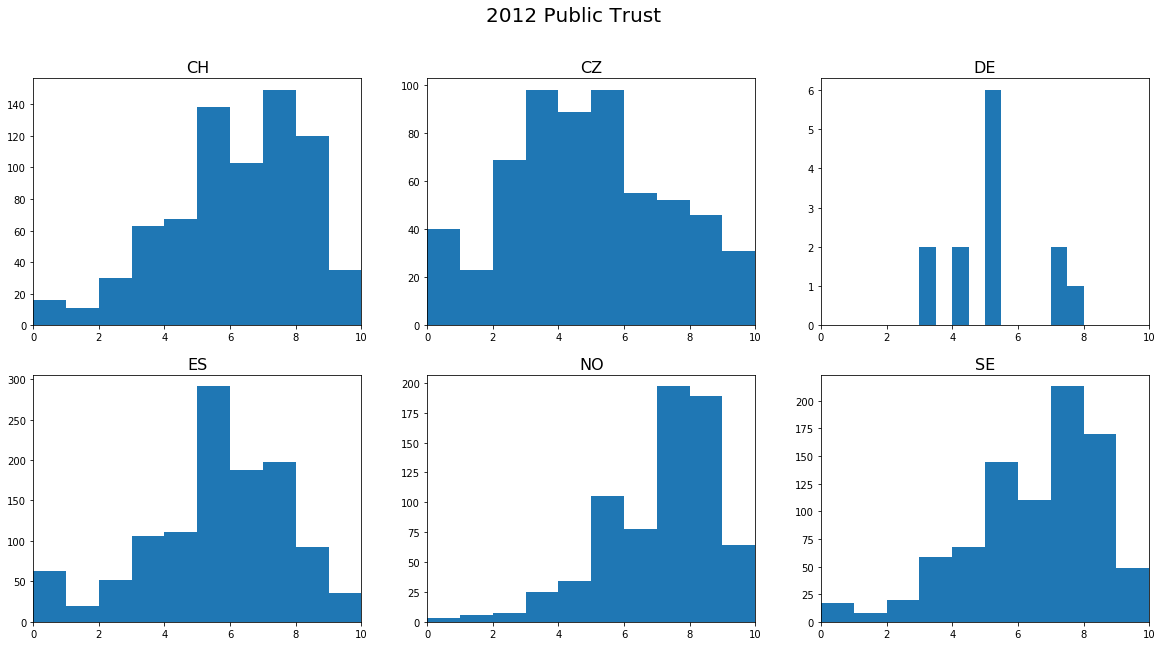

In [9]:
plt.figure(figsize=(20,10))
plt.suptitle('2012 Public Trust', size=20)
idx = 1
for cntry in countries:
    trst = trust_2012['ppltrst'][trust_2012['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(trst)
    plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

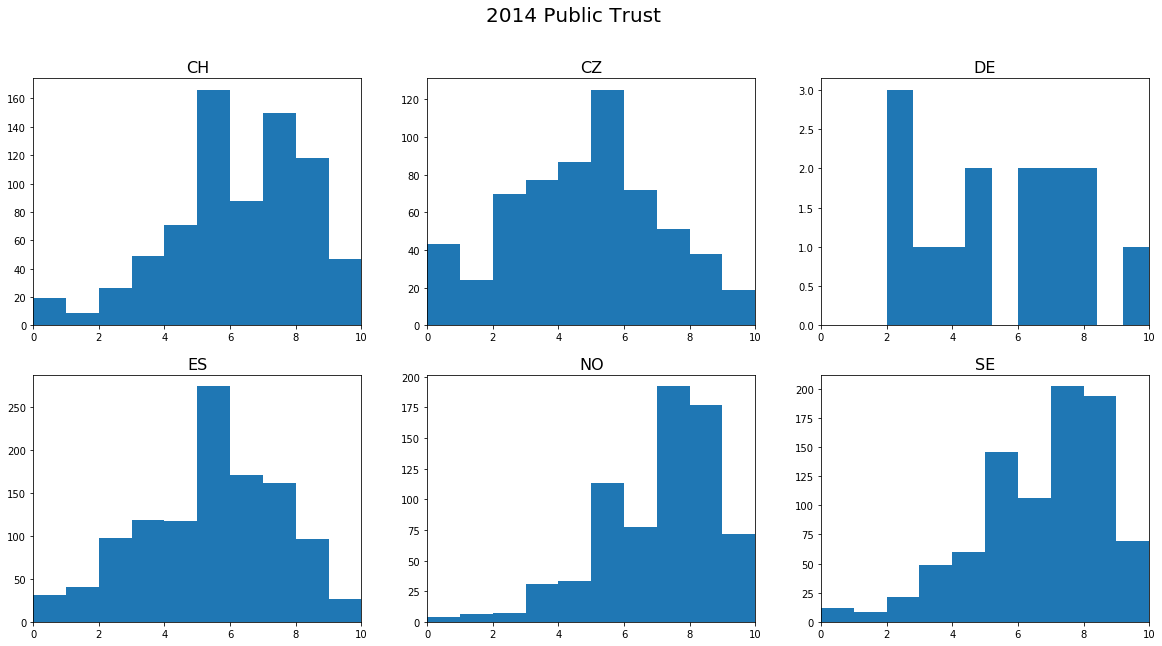

In [10]:
plt.figure(figsize=(20,10))
plt.suptitle('2014 Public Trust', size=20)
idx = 1
for cntry in countries:
    trst = trust_2014['ppltrst'][trust_2014['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(trst)
    plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

In [11]:
change_overtime= data.groupby(['year', 'cntry'])['ppltrst'].mean()
change_overtime=pd.DataFrame(change_overtime)

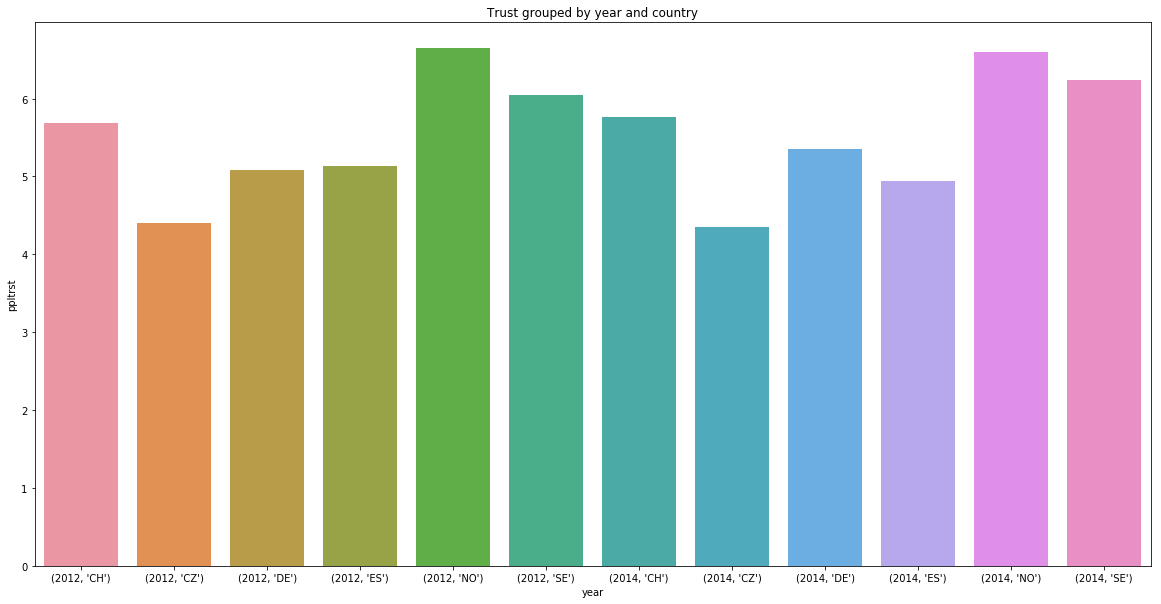

In [12]:
change_overtime['year']=change_overtime.index
plt.figure(figsize=(20,10))
sns.barplot(x='year', y='ppltrst', data=change_overtime)
plt.title('Trust grouped by year and country')
plt.show()

In [13]:
print('2012', trust_2012.mean())
print('2014', trust_2014.mean())

2012 ppltrst    5.578482
dtype: float64
2014 ppltrst    5.571394
dtype: float64


In [14]:
# The average trust goes down slightly from 2012 to 2014, but only by 0.007, so not much at all. Let's compare the 
# trust for 2012 and 2014 by individual country
print('Country\t\t2012\t\t2014')
for cntry in countries:
    cntry_2012 = trust_2012['ppltrst'][trust_2012['cntry'] == cntry].mean()
    cntry_2014 = trust_2014['ppltrst'][trust_2014['cntry'] == cntry].mean()
    
    print(cntry, ': ', cntry_2012, cntry_2014)

Country		2012		2014
CH :  5.685792349726776 5.764468371467026
CZ :  4.402662229617304 4.356435643564357
DE :  5.076923076923077 5.357142857142857
ES :  5.127806563039724 4.940035273368607
NO :  6.648305084745763 6.599719101123595
SE :  6.043073341094296 6.239907727797001


Here we see that trust goes up from 2012 to 2014 in the countries Switzerland (CH), Germany (DE), and Sweden (SE) and in the countries Spain (ES), Czech Republic (CZ) and Norway (NO) the trust goes down. The highest changes are in the countries Spain and Sweden at 0.187 and 0.196 respectively

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [15]:
happy_2012 = data[['cntry', 'happy']][data['year'] == 2012]
happy_2014= data[['cntry', 'happy']][data['year'] ==2014]

In [16]:
print('2012', happy_2012.mean())
print('2014', happy_2014.mean())

2012 happy    7.731516
dtype: float64
2014 happy    7.685476
dtype: float64


In [17]:
print('Country\t\t2012\t\t2014')
for cntry in countries:
    cntry_2012 = happy_2012['happy'][happy_2012['cntry'] == cntry].mean()
    cntry_2014 = happy_2014['happy'][happy_2014['cntry'] == cntry].mean()
    
    print(cntry, ': ', cntry_2012, cntry_2014)

Country		2012		2014
CH :  8.083333333333334 8.142664872139973
CZ :  6.790349417637271 6.922442244224422
DE :  7.3076923076923075 7.857142857142857
ES :  7.557858376511226 7.450617283950617
NO :  8.252824858757062 7.919943820224719
SE :  7.90104772991851 7.9388696655132645


The difference in happiness from 2012 to 2014 was only -0.05. There is a slight decrease in Norway's and Spain's happiness but otherwise happiness increases. Let's look at the distribution to see the significance of this difference for each country

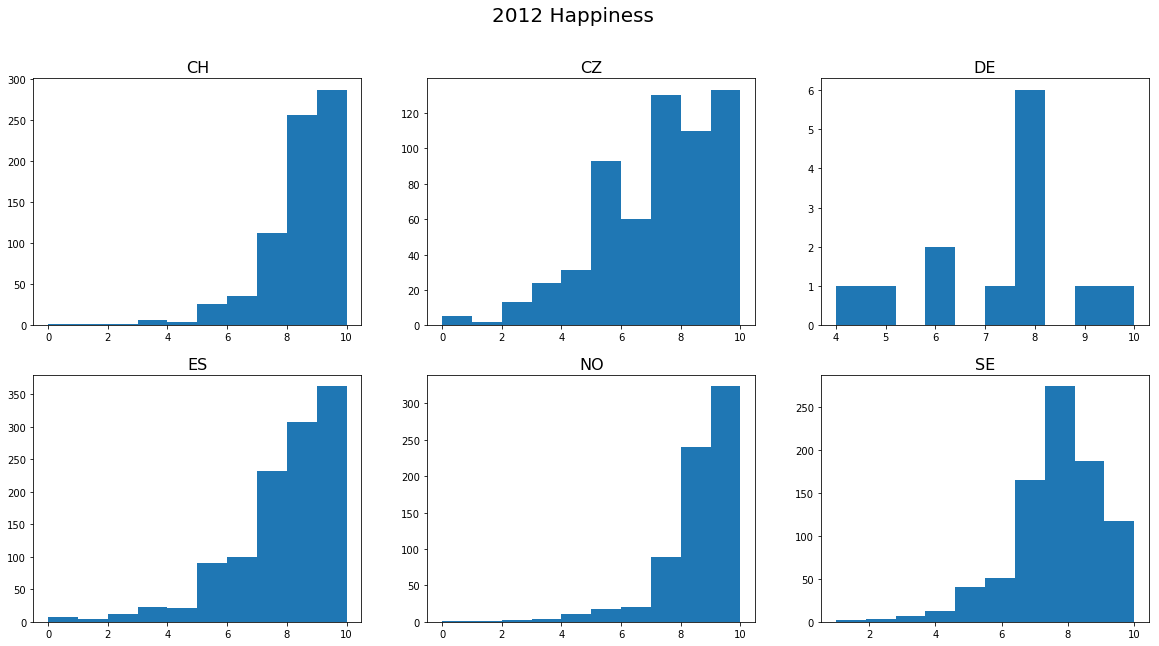

In [18]:
plt.figure(figsize=(20,10))
plt.suptitle('2012 Happiness', size=20)
idx = 1
for cntry in countries:
    happy = happy_2012['happy'][happy_2012['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(happy)
    #plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

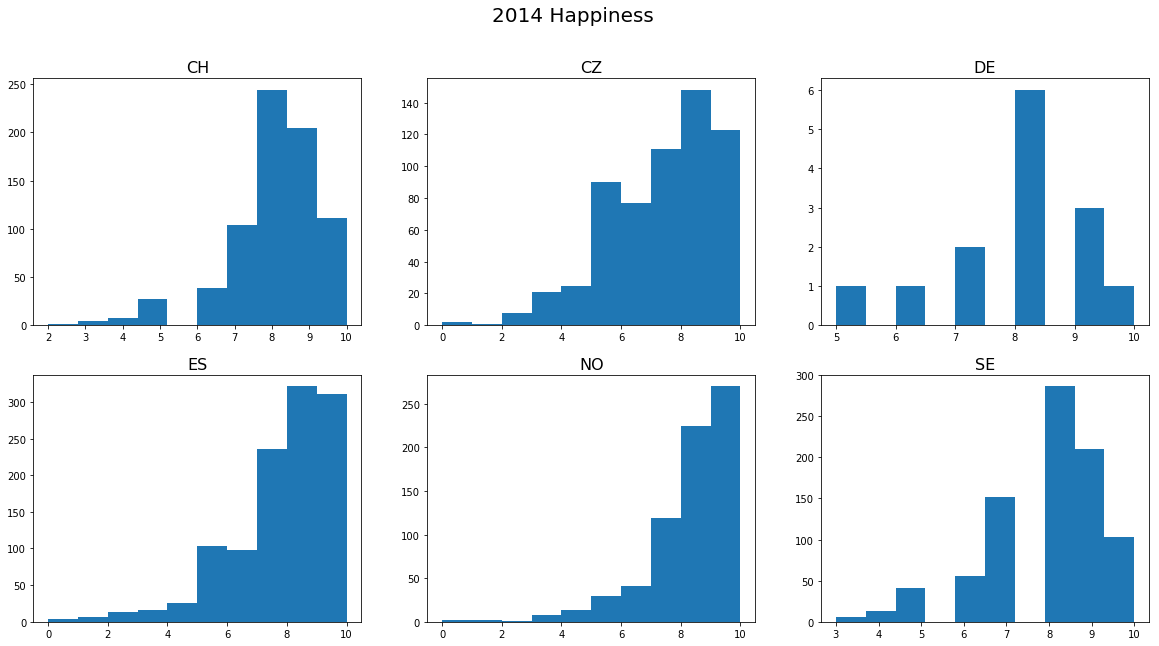

In [19]:
plt.figure(figsize=(20,10))
plt.suptitle('2014 Happiness', size=20)
idx = 1
for cntry in countries:
    happy = happy_2014['happy'][happy_2014['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(happy)
    #plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

Their distributions are all skewed and non-normal. For this type of distribution, we can use Wilcoxon test.

In [20]:
print('Country\tW\t\tp-value')
for cntry in countries:
    hppy_2012 = happy_2012['happy'][happy_2012['cntry'] == cntry]
    hppy_2014 = happy_2014['happy'][happy_2014['cntry'] == cntry]
    
    hppy_2012 = hppy_2012.tolist()
    hppy_2014 = hppy_2014.tolist()
    
    # Dealing with unequal list lengths
    maxid = len(hppy_2012)
    if len(hppy_2014) < maxid:
        maxid = len(hppy_2014)
    
    # Wilcoxon Test
    w, p = stats.wilcoxon(hppy_2012[:maxid], hppy_2014[:maxid])
    
    print(cntry, ': ', w, '\t', p)

Country	W		p-value
CH :  72908.5 	 0.5767042949680168
CZ :  61773.5 	 0.38263492515573405
DE :  17.0 	 0.5071224553598253
ES :  212608.0 	 0.17284338638135865
NO :  64696.0 	 1.6078039491474595e-05
SE :  110648.0 	 0.72351428366515


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


The only country that has a change in happiness that is statistically significant is Norway

## 3. Who reported watching more TV in 2012, men or women?

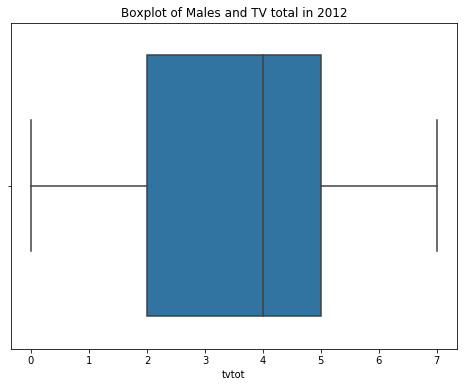

In [21]:
# Change values for gender to strings
data['gndr'] = ['Male' if v == 1.0 else 'Female' for v in data.gndr.values]

Male_tv_2012 = data['tvtot'][(data['year'] == 2012) & (data['gndr'] == 'Male')]
Female_tv_2012 = data['tvtot'][(data['year'] == 2012) & (data['gndr'] == 'Female')]

plt.figure(figsize=(8,6))
sns.boxplot(Male_tv_2012)
plt.title('Boxplot of Males and TV total in 2012')
plt.show()

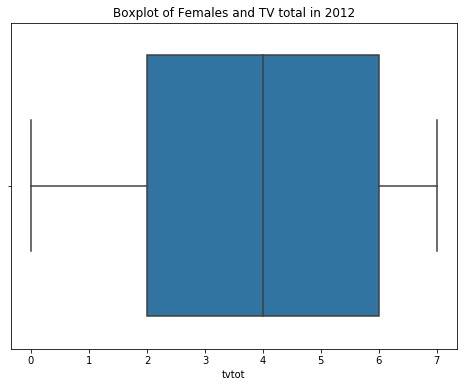

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(Female_tv_2012)
plt.title('Boxplot of Females and TV total in 2012')
plt.show()

In [23]:
# Using shapiro to see if the data is normal
print('Men: ', stats.shapiro(Male_tv_2012))
print('Women: ', stats.shapiro(Female_tv_2012))

Men:  (0.9443334937095642, 3.718612884828085e-27)
Women:  (0.9407297372817993, 1.0867231118970029e-27)


In [24]:
# shapiro confirms data is normal. Because distribution is normal, we can do a t-test.
stats.ttest_ind(Male_tv_2012, Female_tv_2012)

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)

This shows that the results are not statistically significant

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [25]:
# Changing numbers into strings for column living with a partner, yes or no
data['partner'] = ['Yes' if v == 1.0 else 'No' for v in data.partner.values]

In [26]:
Yes_partner_2012 = data['pplfair'][(data['year'] == 2012) & (data['partner'] == 'Yes')]
No_partner_2012 = data['pplfair'][(data['year'] == 2012) & (data['partner'] == 'No')]

print(Yes_partner_2012.mean())
print(No_partner_2012.mean())

6.0743509047993705
5.86592544146501


This shows that people living with partners believe that people are more fair than those living without partners.

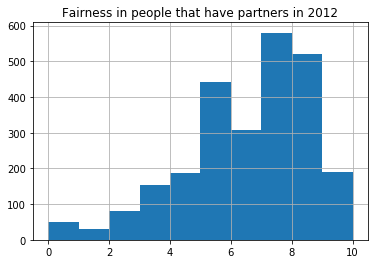

In [27]:
# Histogram of fairness for people living with partners in 2012
Yes_partner_2012.hist()
plt.title('Fairness in people that have partners in 2012')
plt.show()

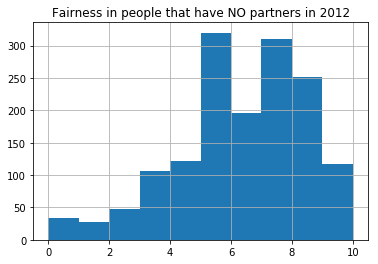

In [28]:
# Histogram of fairness for people living without partners in 2012
No_partner_2012.hist()
plt.title('Fairness in people that have NO partners in 2012')
plt.show()

In [29]:
print('Alone: ', stats.shapiro(Yes_partner_2012))
print('Partner: ', stats.shapiro(No_partner_2012))

Alone:  (0.9396088123321533, 5.344745707680362e-31)
Partner:  (0.9547916650772095, 2.436869843664993e-21)


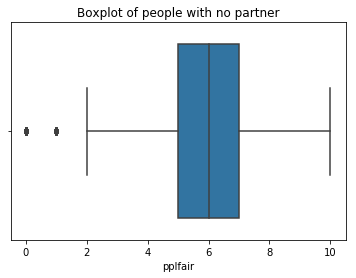

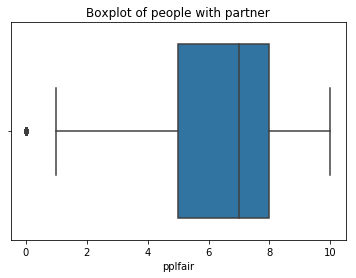

In [30]:
sns.boxplot(No_partner_2012)
plt.title('Boxplot of people with no partner')
plt.show()

sns.boxplot(Yes_partner_2012)
plt.title('Boxplot of people with partner')
plt.show()

In [31]:
# The shapiro results show high values so let's try a t-test
stats.ttest_ind(No_partner_2012, Yes_partner_2012)

Ttest_indResult(statistic=-3.0430439318464235, pvalue=0.002356936676939248)

The t-test shows that the results are significant, meaning that people living with partners believe people are more fair than those not living with partners.

## 5. Pick three countries and compare how often people met socially in 2014. Are there differences, and if so which countries stand out?

In [32]:
data.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [33]:
# Pick 3 countries
Czech= data['sclmeet'][(data['year']==2014) &(data['cntry'] == 'CH')]
Spain= data['sclmeet'][(data['year']==2014) &(data['cntry'] == 'ES')]
Norway= data['sclmeet'][(data['year']==2014) &(data['cntry'] == 'NO')]

countries= ['CH', 'ES', 'NO']
cntry_data= (Czech, Spain, Norway)

for c, d in zip(countries, cntry_data):
    print(c, ': ', d.mean())

CH :  5.174966352624495
ES :  5.263668430335097
NO :  5.310393258426966


The means don't show that much of a difference between the 3 countries so let's try looking at the distributions

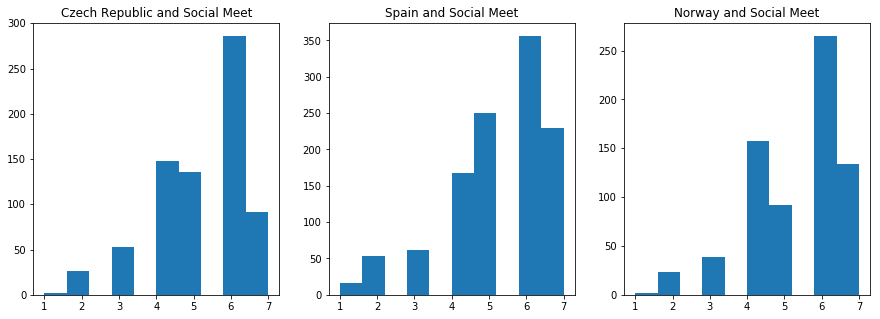

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(Czech)
plt.title('Czech Republic and Social Meet')
plt.xlabel('')

plt.subplot(1,3,2)
plt.hist(Spain)
plt.title('Spain and Social Meet')

plt.subplot(1,3,3)
plt.hist(Norway)
plt.title('Norway and Social Meet')
plt.show()

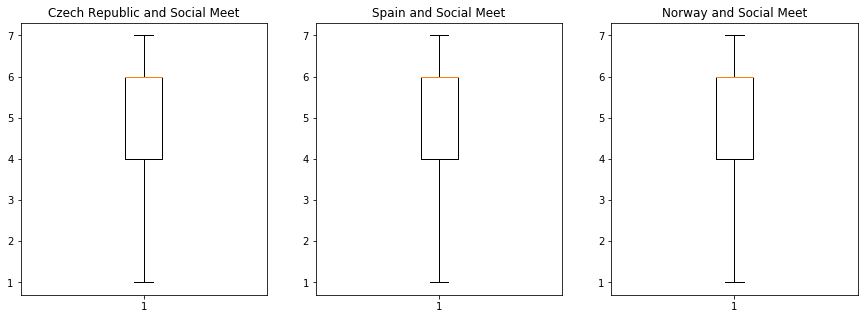

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(Czech)
plt.title('Czech Republic and Social Meet')
plt.xlabel('')

plt.subplot(1,3,2)
plt.boxplot(Spain)
plt.title('Spain and Social Meet')

plt.subplot(1,3,3)
plt.boxplot(Norway)
plt.title('Norway and Social Meet')
plt.show()

In [36]:
# Performing shapiro tests
for c, d in zip(countries, cntry_data):
    print(c, ': ', stats.shapiro(d))

CH :  (0.8976361155509949, 7.658747353767709e-22)
ES :  (0.8927679657936096, 2.280180298346974e-27)
NO :  (0.887718915939331, 2.537563078833279e-22)


In [37]:
# Distributions are somewhat normal so let's try a t-test

CH_ES = stats.ttest_ind(Czech, Spain)
ES_NO = stats.ttest_ind(Spain, Norway)
NO_CH = stats.ttest_ind(Norway, Czech)

print('Country Tests\t\tT-Test Stat\t\tp-value')
print('Czech Republic and Spain:', CH_ES[0], CH_ES[1])
print('Spain and Norway : ', ES_NO[0], ES_NO[1])
print('Norway and Czech Republic: ', NO_CH[0], NO_CH[1])

Country Tests		T-Test Stat		p-value
Czech Republic and Spain: -1.3563979158247432 0.17513589623821907
Spain and Norway :  -0.6968046493592841 0.48601288469157433
Norway and Czech Republic:  1.9524600649137105 0.05107541004946689


The only significant difference is between Norway and the Czech Republic.

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [38]:
CH_age_year_scact= data['sclact'][(data['year']==2014) &(data['cntry'] == 'CH')&(data['agea'])]
ES_age_year_scact= data['sclact'][(data['year']==2014) &(data['cntry'] == 'ES')&(data['agea'])]
NO_age_year_scact= data['sclact'][(data['year']==2014) &(data['cntry'] == 'NO')&(data['agea'])]

In [39]:
countries=['CH', 'ES', 'NO']
scact= [CH_age_year_scact, ES_age_year_scact, NO_age_year_scact]

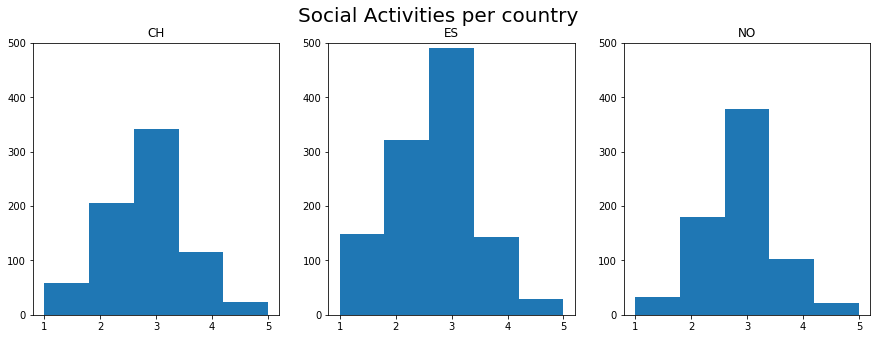

In [40]:
plt.figure(figsize=(15,5))
plt.suptitle('Social Activities per country', size=20)
idx = 1 
for c, d in zip(countries, scact):
    plt.subplot(1,3,idx)
    plt.hist(d, bins=5)
    plt.ylim(0,500)
    plt.title(c)
    idx += 1
plt.show()

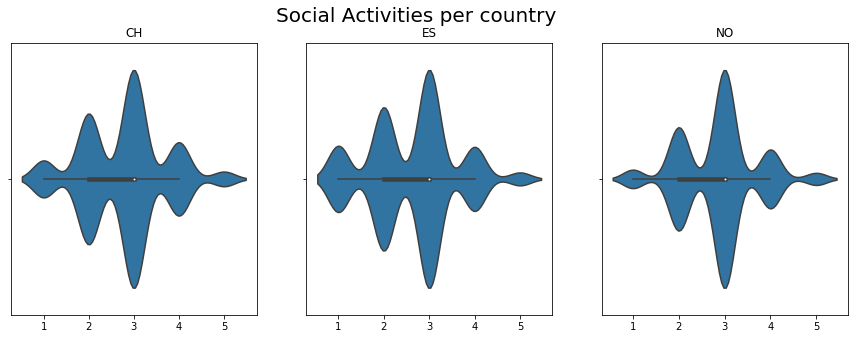

In [41]:
plt.figure(figsize=(15,5))
plt.suptitle('Social Activities per country', size=20)
idx = 1 
for c, d in zip(countries, scact):
    plt.subplot(1,3,idx)
    sns.violinplot(d, bins=5)
    plt.title(c)
    plt.xlabel('')
    idx += 1
plt.show()

In [42]:
CH_age_year_scact=pd.DataFrame(CH_age_year_scact)
ES_age_year_scact=pd.DataFrame(ES_age_year_scact)
NO_age_year_scact=pd.DataFrame(NO_age_year_scact)

In [47]:
CH_ES = stats.ttest_ind(CH_age_year_scact, ES_age_year_scact)
ES_NO = stats.ttest_ind(ES_age_year_scact, NO_age_year_scact)
NO_CH = stats.ttest_ind(NO_age_year_scact, CH_age_year_scact)

print('Country Tests\t\tT-Test Stat\t\tp-value')
print('Czech Republic and Spain:', CH_ES[0], CH_ES[1])
print('Spain and Norway : ', ES_NO[0], ES_NO[1])
print('Norway and Czech Republic: ', NO_CH[0], NO_CH[1])

Country Tests		T-Test Stat		p-value
Czech Republic and Spain: [3.47898793] [0.00051481]
Spain and Norway :  [-5.31751241] [1.17992913e-07]
Norway and Czech Republic:  [1.68066188] [0.09304354]


Spain and Norway are the only countries with a significant difference between the two.